## Coevolution of kin altruism and kin recognition

This is a simple model of the evolution of altruism via kin selection / kin recognition. 

### background

Kin selection is one of the most important concepts in the biology of social behavior. 

For kinship to foster altruism, there must be some way that individuals can deliver their help preferentially to their kin. One way this can happen is if individuals interact with their family members more often than chance. The current model explores another way: individuals can recognize their kin (kin recognition) and decide to help only their family members (nepotism). 

In the model, kin recognition is optional and costly to the individual (because of the extra resources it takes to build a nervous system capable of recognizing kin). It is a testament to the power of kin selection that individuals are 'willing' to pay the cost of a kin recognition machinery in order to preferentially help their kin.

In addition to being an illustration of the evolution of kin altruism, this model is a good example of the concept of coevolution: kin recognition and nepotism both depend on each other to be evolutionary successful. 


### how the model works

Each generation, every agent in a population plays a donation game with another agent, then all agents reproduce as a function of their relative fitness and die.

The donation game is a very simple game where player 1 can 'Cooperate', i.e. pay a cost of $c$ to give a benefit $b$ to player 2, or 'Defect'. Player 2 is a passive recipient.

Reproduction is asexual. Every agent who gets to reproduce contributes an even number of offspring to the next generation. This means that every agent has at least one sibling, who is a perfect clone of itself.

The rate of sibling encounter is manipulated by a parameter r, which regulates how likely an agent is to be paired with one of its (clonal) sibling, when playing the donation game. I.e. an agent plays the donation game with its sibling with probability r, and with a randomly selected stranger with probability 1-r.

### strategies

Agents have two genes. The first gene determines an agent's behavioral strategy, and can take the following values:

-Cooperate: always cooperate

-Defect: always defect

-Nepotist: if you can't recognize kin, always defect. If you can recognize kin, then cooperate when paired with a sibling, and defect when paired with a stranger

The second gene determines whether the agent has the ability to recognize siblings. It can take the value "R" for Recognizer, and "I", for "Ignorant".

We assume that the kin recognition ability is costly because of the extra resources it takes to build a nervous system capable of recognizing kin. Therefore every agent playing "R" pays a small cost $d$ at the start of their life cycle.




### dynamics

By playing around with the model, one can see that despite its cost, kin recognition often evolves. It is evolutionarily successful because of its co-evolution with the Nepotist strategy. Nepotists are willing to pay the cost of kin recognition when it is compensated by the gains that come from not having to indiscriminately help everyone.

An interesting exercise is to manipulate the value of $r$, the base rate of sibling encounter, while keeping other parameters fixed (with $b$ and $c$ large relative to $d$). Then one typically sees that all strategies are possible. When $r$ is small, indiscriminate defection is the only successful strategy, because sibling encounters are too rare for a kin recognition neural machinery to be a worthwhile investment. When $r$ approaches 1, indiscriminate cooperation prevails, because the ability to recognize kin does not provide much extra information. Kin recognition (along with Nepotism) evolves for intermediate values of $r$.


### things to try

You can try to modify the parameters below and see what happens.

In [1]:
#cost and benefit of helping
b = 30
c = -10

#cost of neurodevelopment for Kin recognition
d = -2

#the initial strategy
initial_strategy = ["D", "I"]

#population size
N = 100

#number of generations
g = 1000

#mutation rate
mu = .01

#rate of sibling interaction
r = 1/8

### Import the necessary libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### General parameters of the model

In [3]:
#initial fitness
initial_fitness = 5

### Specific game parameters

In [4]:
#the strategy space
strategy_space = [["C", "D", "N"],["R", "I"]]
 

### Define the "agent" class

In [5]:
#this tells the program what an agent looks like,
#e.g. it has fitness, is able to mutate, etc
class agent:
    def __init__(self, name, parent_name, strategy, fitness):
        self.name = name
        self.strategy = strategy
        self.fitness = fitness
        self.parent_name = parent_name
    
    def mutate(self):
        index = 0 if np.random.uniform() < 1/2 else 1
        self.strategy[index] = np.random.choice(strategy_space[index])
       
            
    def add_to_fitness(self, increment):
        self.fitness += increment

        
        

### Some key functions


In [6]:
def initialize():
    #pop.clear()
    return([agent(i, 0, initial_strategy, initial_fitness) for i in range(N)])

In [7]:
#the function to compute the population proportion
#for a given strategy


def average_X(X):
    counter=0;
    strategy_index = 0;
    strategy_index = max(idx for idx, val in enumerate(strategy_space) if X in val)
    counter = len([i for i in pop if i.strategy[strategy_index] == X])
    return counter/N

In [8]:
#the successor function
#used to pairs an element in an array with its successor in that array,
#where the successor is either the next element,
#or the 0th element, if the focal element is the last element in the array

def successor(current, total):
    if current < total:
        return current + 1
    if current == total:
        return 0

In [9]:
#makes agents play games
#assortment is non-random: agents are more likely to play with their
#sibling, where the parameter r controls the degree of non-randomness
#of the assortment

def non_random_games():
    
    #this subfunction finds the sibling of a focal agent,
    #and makes the two agents play a game
    def find_sibling(i):
        player1 = arena[i]
        #sibling_found = False
        #while sibling_found == False:
        for j, val in enumerate(arena):
        #for j in range(len(arena)):
            #player2 = arena[j]
            player2 = val
            if pop[player1].parent_name == pop[player2].parent_name and i != j:
                DG(player1, player2)
                break
                #if i != j:
                    #DG(player1, player2)
                    #sibling_found = True
                    #break
                        
    #this subfunction finds a random other player,
    #and makes the two agents play a game                    
    def find_stranger(i):
        index_player1 = i
        index_player2 = successor(i, len(arena)-1)
        player1 = arena[index_player1]
        player2 = arena[index_player2]
        if (index_player1 != index_player2):
            DG(player1, player2)
    
    #creates an array where we put the names of every agent
    #in the population
    arena = list(range(N))
    np.random.shuffle(arena)
    
    #for every name in the array, make the corresponding agent play a game
    #with probability r, he is paired with its sibling
    #with probability 1-r, he is paired with a random player
    for i in range(len(arena)):
        random_number = np.random.uniform()
        if random_number < r :
            find_sibling(i)
        else:
            find_stranger(i)
            
    

In [10]:
#the donation game

def DG(player1, player2):
    cue = False
    player1_strat = pop[player1].strategy[0]
    player1_cog = pop[player1].strategy[1]
    if pop[player1].parent_name == pop[player2].parent_name:
        cue = True
        
    if player1_strat == "C":
        pop[player2].add_to_fitness(b)
        pop[player1].add_to_fitness(c)
        
    if (player1_strat == "N") & (cue == True) & (player1_cog == "R"):
        pop[player2].add_to_fitness(b)
        pop[player1].add_to_fitness(c)
    
    
    
    


In [11]:
#the selection function and its building blocks

#standardize fitness so that agents with lowest fitness have fitness 1
def standardization():
        
        min_fitness = min(x.fitness for x in pop)
        for i in range(N):
            pop[i].fitness += 1
            pop[i].fitness -= min_fitness
        

#each agent gets to put its name in a hat w times, where w is its fitness
def lottery_prep():
    hat = []
    for i in range(N):
        for j in range(pop[i].fitness):
            hat.append(pop[i].name)
    return hat

#create the next generation by drawing the name of the parents from the hat
def reproduction(hat):
    #for every even number from 0 to N-1, 
    #we select a parent by drawing a name from its hat
    #this parent makes two offspring, who get the same
    #'parent's name' tag identifying them as siblings
    temporary_pop=[]
    for i in range(N):
        if i%2 == 0:
            name_drawn = np.random.choice(hat)
            parent_name = name_drawn
            hereditary_package = [parent_name, [pop[name_drawn].strategy[0], pop[name_drawn].strategy[1]]]
            temporary_pop.append(agent(i, hereditary_package[0], hereditary_package[1], initial_fitness))
            temporary_pop.append(agent(i+1, hereditary_package[0], hereditary_package[1], initial_fitness))
    pop.clear()
    for i in range(N):
        pop.append(temporary_pop[i])


#the selection function

def selection():

    standardization()
    hat=lottery_prep()
    reproduction(hat)





In [12]:
#make every agent capable of kin recognition pay the cost of neurodevelopment
def neurodevelopment():
    for i in range(N):
        if pop[i].strategy[1]=="R":
            pop[i].add_to_fitness(d)

In [13]:
#the mutation function
def mutation():
    for i in range(N):
        if (np.random.uniform() < mu):
            pop[i].mutate()

### Run the model and plot the dynamics

(0, 1.05)

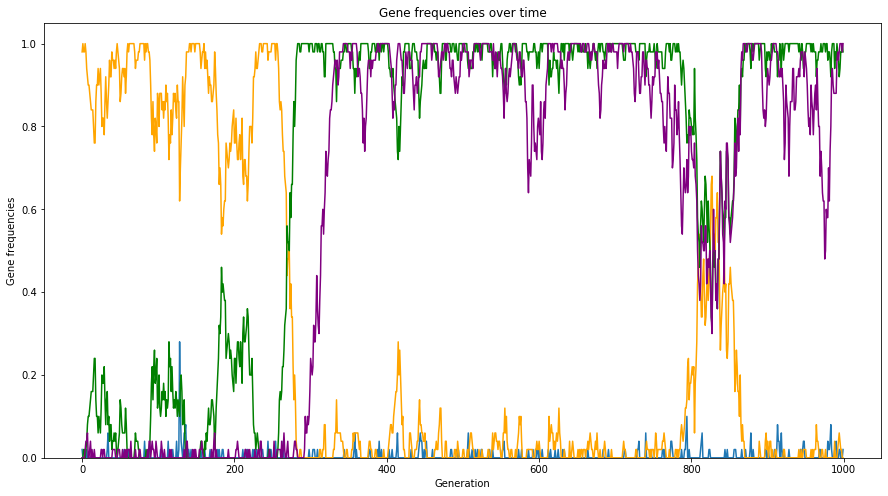

In [14]:
#Run model


#these arrays records average strategy proportions across a run
Average_coop = []
Average_defect = []
Average_nep = []
Average_recog = []
Average_indif = []



#initialize()
pop = initialize()

#run the model for g generations
for i in range(g):
    neurodevelopment()
    non_random_games()
    selection()
    mutation()
    Average_coop.append(average_X("C"))
    Average_defect.append(average_X("D"))
    Average_nep.append(average_X("N"))
    Average_recog.append(average_X("R"))
    Average_indif.append(average_X("I"))
    
#graph the outcome of the simulation    
plt.figure( figsize=( 15, 8 ) )

plt.title('Gene frequencies over time')

plt.ylabel('Gene frequencies')
plt.xlabel('Generation')
plt.plot(Average_coop)
plt.plot(Average_defect, color="orange")
plt.plot(Average_nep, color="green")
plt.plot(Average_recog, color="purple")
plt.ylim(0,1.05)


### graph legend

Behavioral strategies: 

Blue = Cooperator; Orange = Defector; Green = Nepotist

The Purple curve is the proportion of Recognizers in the population
